# Performance of Neural Network

How to make the accuracy: `90% --> 93%`

## 1. Fine tuning the hyperparameters:
Hyperparameters:-
- No of hidden layers
- No of neurons in a layer
- Learning rate
- Optimizer
- Batch size ? (increase or decrease
- Activation fn
- Epochs

Still the performance may not increase, because of following problems.

* Vanishing/Exploding gd
* Not enough data for deep NN
* Slow training
* Overfitting ( too many parameters in NN)

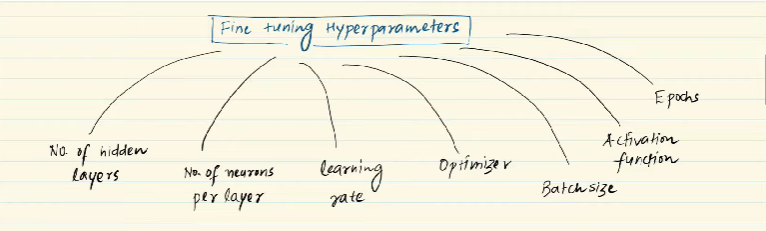

### 1. No of hidden layers
* Take multiple hidden layers with fewer neurons rather than single layers with too many neurons.

1 layer(with 32 neurons) $<$ 4 layers (with 8 neurons)

## Why no of hidden layers matter more than higher no of neurons in a single layer
Bcoz deep learning uses a technique called `representation learning`.
* First hidden layer capture primitive features ( like `lines, edges` )
  - These layers are important in `transfer learning`, to capture primitive features
* Next layer capture some more easily caught features
* Next layers capture some latent features 

## 2. Neurons / layers

* No of nodes in a layer should be sufficient.

## 3. Batch Size
* smaller ( 8 to 32) or large( eg. 8192 ), both has its disadvantage.
* But smaller mostly preferred.
  
* For larger batch size, keep `lr` smaller in initial epochs, and keep increasing further ( `Warming up Learning rate`)

## 4. Epochs
* Keep higher 100, 500, 1000
* Use early stopping feature in `keras`. it automatically handles it.

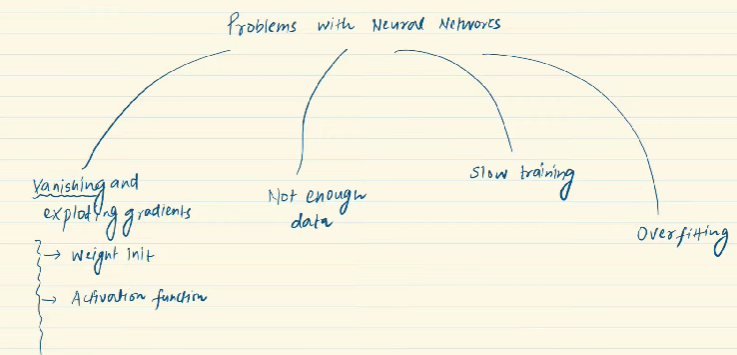


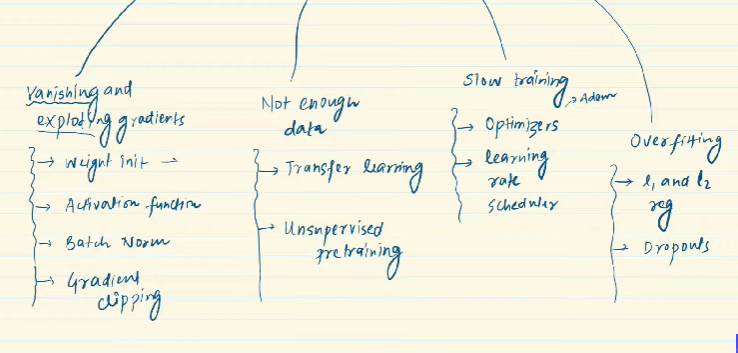

# Early stopping in Neural Network

If we train the NN for larger epochs say `1000` then the loss decrease till certain time and then starts increasing
i.e., `overfitting ` starts

In keras we use a feature called `early stopping` using `callback`

## Code implementation of early stopping

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles


In [15]:
X,y = make_circles(n_samples = 100, noise=0.1, random_state = 1)

In [16]:
df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'label': y})

In [17]:
df.head()

,x1,x2,label
0,-0.636405,-0.368702,1
1,-0.244660,-0.736592,1
2,-0.465971,-1.066877,0
3,-0.709998,-0.408419,1
4,0.702322,-0.517301,1


<Axes: xlabel='x1', ylabel='x2'>

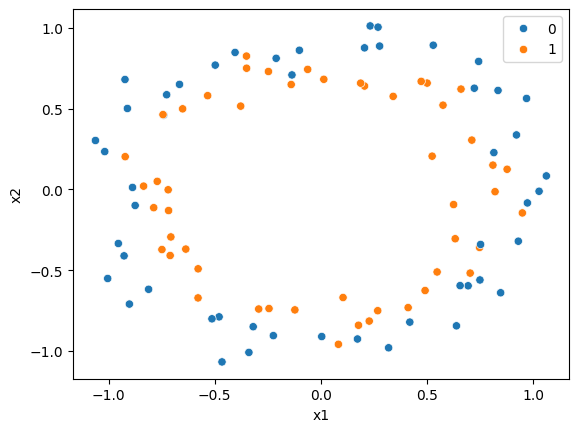

In [18]:
sns.scatterplot(data=df, x = 'x1', y = 'x2', hue = y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [20]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3000, verbose = 0)

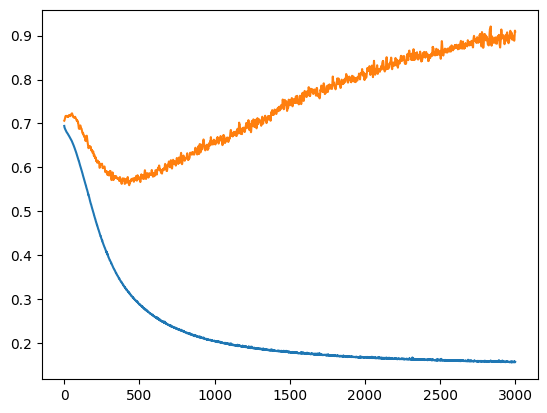

In [23]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')

In [24]:
# We can see that the validation loss increased with higher no of epochs.

## Early stopping

* rather than moving till infinite epochs, it will stop where it is irrelevant to move ahead.

In [25]:
model = Sequential()
model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [26]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [27]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False)

### Again fitting the model but with `callback`

In [28]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1000, callbacks= callback)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4031 - loss: 0.6945 - val_accuracy: 0.4000 - val_loss: 0.6942
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5117 - loss: 0.6911 - val_accuracy: 0.3500 - val_loss: 0.6977
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5539 - loss: 0.6898 - val_accuracy: 0.3500 - val_loss: 0.7006
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6000 - loss: 0.6870 - val_accuracy: 0.3500 - val_loss: 0.7030
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5422 - loss: 0.6888 - val_accuracy: 0.3500 - val_loss: 0.7051
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 0.6843 - val_accuracy: 0.4000 - val_loss: 0.7073
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5680 - loss: 0.6828 - val_accuracy: 0.4000 - val_loss: 0.7089
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5367 - loss: 0.6890 - val_accuracy: 0.4000 - v

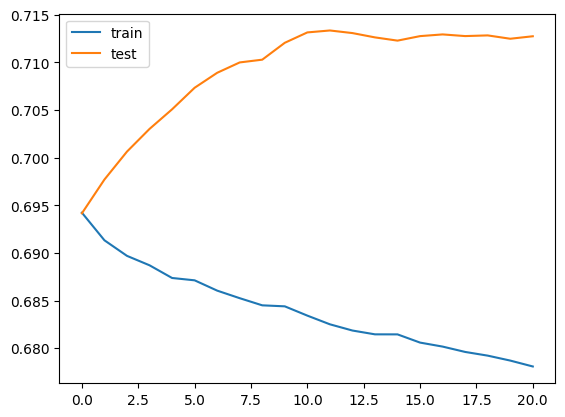

In [29]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label ='test')
plt.legend()

In [30]:
# we see that the validation loss increased too much when callback was not there.
# but with callback it stopped since the model is getting overfitted and doesnot improve on higher epochs.


# Data Scaling in Neural Network

* Scaling helps in convergence faster
* unnormalized data fails to update the weight properly, thus moving towards too high weight change for larger scaled data.
* Thus exploding nature of gradient occur.

### Normalization and Standarization helps here.
* standarization => [-1, 1]
* Normalization => [0, 1]

When max-min already know:- use `normalization`

When pdf normal distributed:= use `standarization`

# Dropout layer

### problem of overfitting:
* ANN are prone to overfitting

Possible solutions:
* Add more data
* Reduce complexity of network, (layer or neurons)
* early stopping helps
* Regularization `l1`, `l2`
* `dropout`

##### droput:- randomly switching off node of any input and hidden layers.

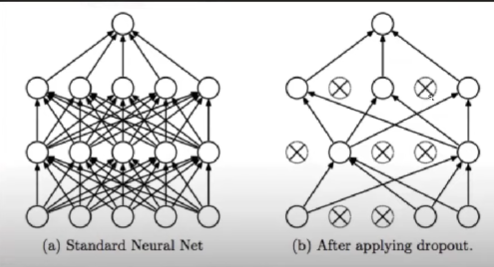

* `logic`:- for each epoch, we are training a different set of network.

* Distracting the algorithm to not focus on any single `precise` feature (protect from over-caring)

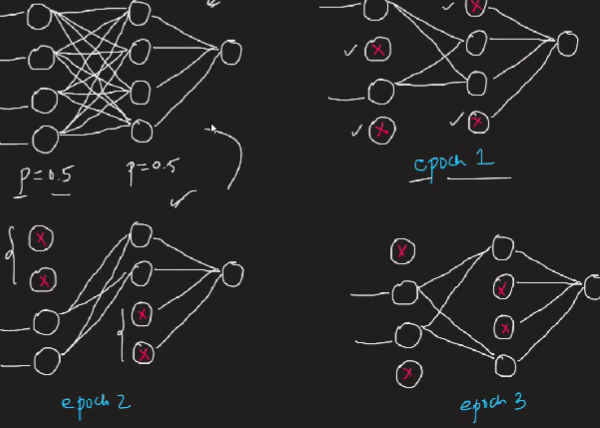

* analogy:- Manger not dependent on each and every individual employee.
* Even when they are absent company works.
    
#### Ranodm forest connection

* Each time we take a different decision tree ( diff set of columns or rows) for training

Dropping is applied only while training and not testing, but while testing we assign `dropout prob` * `weight` to the weight

* value of dropout:
- p = 0 :- Overfitting
- p ~ 1:- Underfitting, More smoothening
* general: p ~ 0.2 - 0.5

### Practical tips for applying dropout

* Apply on the last layer first, not on all the layers.
* For CNN, p = 40-50%
* For Rnn, p = 20 - 30%
* For Ann, p = 10- 20%

Drawaback:
1. Convergence delay.
2. Loss function changes, so debugging the derivative becomes difficult.

# From research paper published on dropout layer:


On MNIST : Image data set

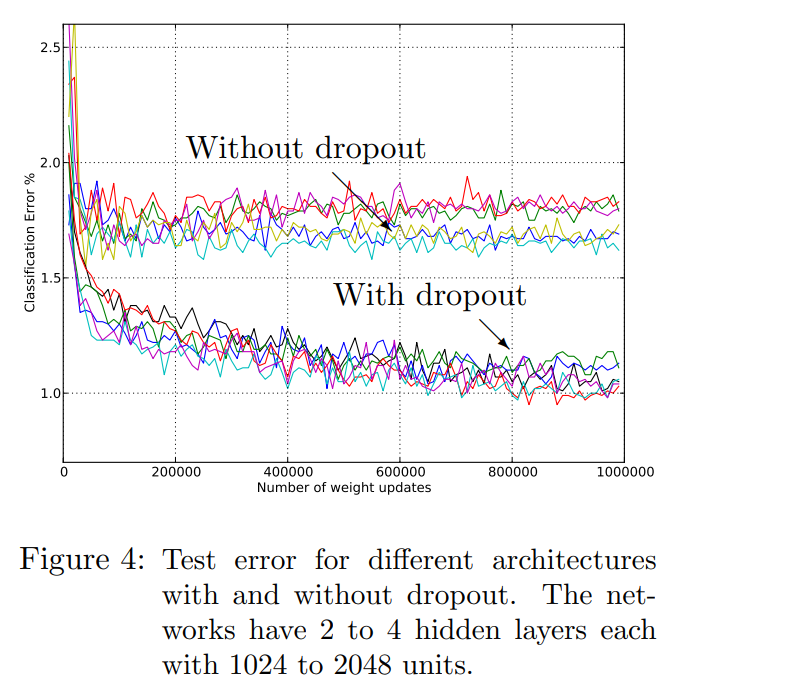

# Regularization

* Roting the training data, but failing on the test data.
* memorizing the whole book w/o understanding the core concepts.

Why artificial neural network tend to overfit?
* Bcoz large no of layers and neurons tend to capture even minute features in data.


Ways to solve the overfitting?
- Adding more data
- Reducing the complexity of model

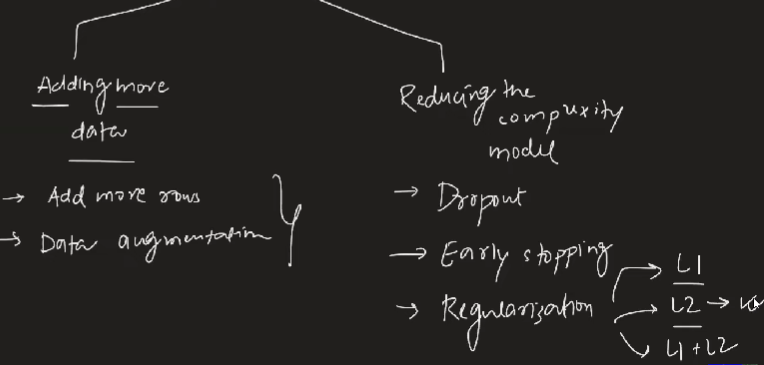

Regularaziation is just addition of a `penalty` term to the loss function.

Bcoz of which the weight decay occur, i.e., the weight shrinks and are more closer to 0.

Mostly `l2` regularization is used than `l1` in deep learning

# Activation Function

* is a gate b/w input and output to capture the non-linear relations

Ideal property of an activation function:
* Non Linear
* Differentiable
* Computationally inexpensive
* Zero centred
* Non saturating: value don't get compressed in a range like [0,1], [-1,1] like sigmoid or tanh.
* Saturating fn lead to vanishing gradient problem.
* relu is non saturating.

### 1. Sigmoid

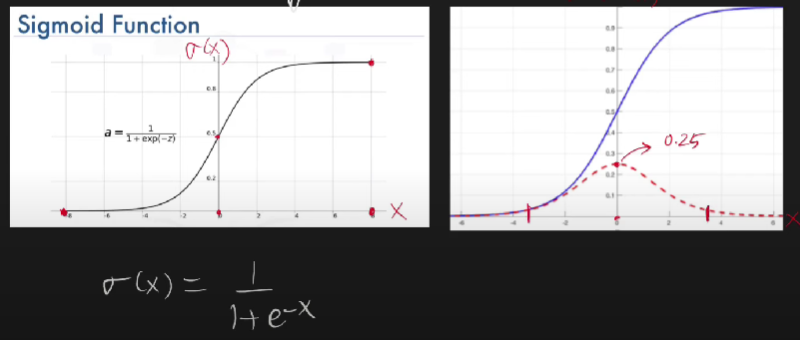

Advantage of using sigmoid:
* output lies in [0,1] ->  can be used to fidn the probability for binary classification problem.
* Differentiable.

Disadvantages:
* Saturating function: [${-inf}$, ${inf}$] -> [0,1] squezzed. lead to vanishing gradient.
* Can't be used in hidden layers ( vanishing grad). only used in last layer for output.
* Non-zero centred. Training slow --> convergence problem
* - Weights upadated in a layer is all +ve or all -ve, i.e., it get restricted.
* computationally expensive to compute `exp` function

#### 2. Tanh 

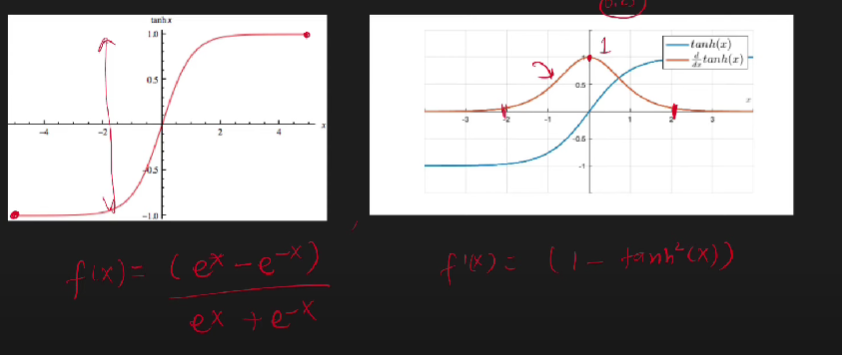

Advantage:
* Non linear
* differentiable
* zero-centred (gradients are +ve as well as -ve ) so convergence fast

Disadvantage:
* Saturating fun --> vanishing grad
* computational expensive --> exponential calculation

#### 3. Relu 

= $ max(0, x) $

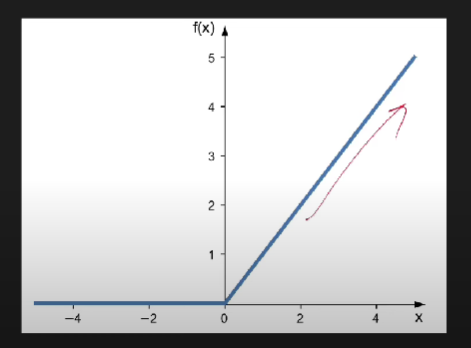

Advantage:
* Non linear function
* Not saturated in +ve region
* computation easy
* convergence faster than sigmoid/tanh

Disadvantage:
* Not completely diff ( done in 2 regions)
* Non zero centred like sigmoid, but `batch normalization` solves its issue

Problem with the `relu` function:
#### Dying relu problem

#### Disadvantage of relu 

* For any given input output is always `0` for a neuron and it exist for whole time.
* Worst case: All neuron are dead 100% dead

If `z` becomes `0`, then relu ouput is `0`, thus the update in weights become 0 as the whole derivative = `0`

And so no learning is seen.


* Reason for `z` to be `-ve`.
* - too high learning rate, lead to -ve weights
  - high `-ve` bias
 
Solutions for `dying` relu
* Set low `learning rate`
* bias ->  `+ve`, `0.01`
* dont' use relu -> `variants` of relu

#### Variants of `relu`

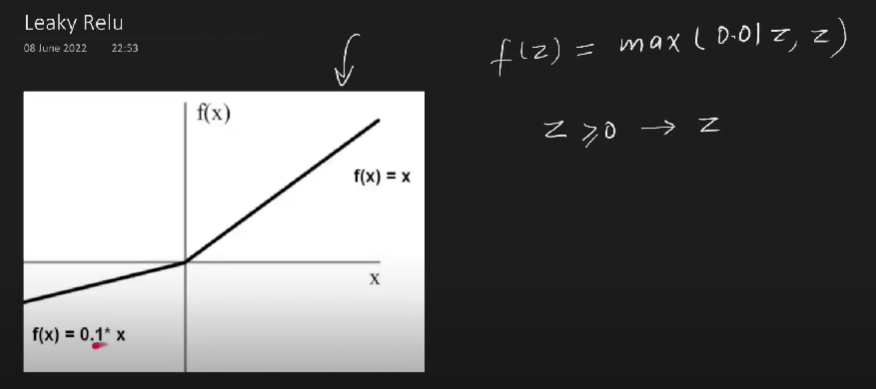


* derivative of relu for -ve doesnot become `0`.

Advantage:
* Non saturated
* No dying relu
* close of 0 centre (+ve / -ve)

##### Parametric relu

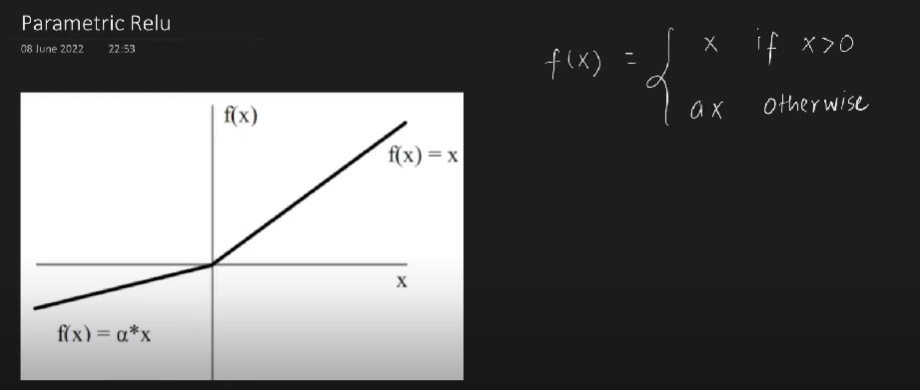

Exponential linear unit

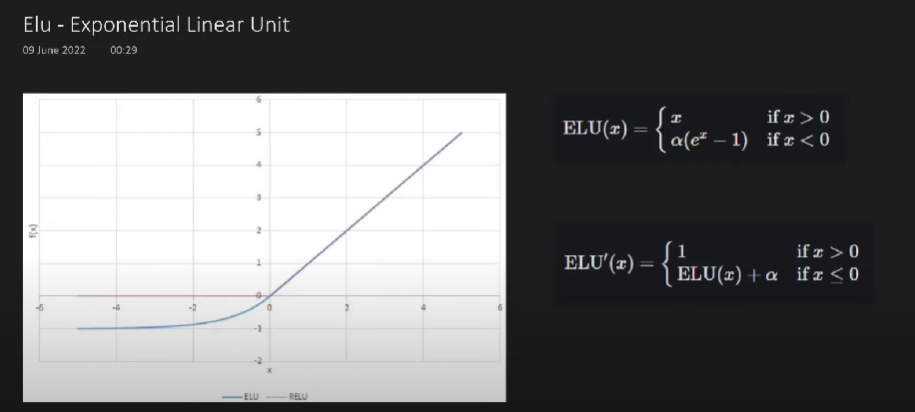

* Function is always continous

# Weight Initialization

## what not to do?

For relu and tanh
* Zero initalization:- no weight update, output to a neuron will be same for that layer ie. `0`.

For `sigmoid`: all the derivate to a neuron will be same.
new weights will be same (update in same way).
In short it will behave like perceptron, ie. like a single neuron.

* Non -`0` constant value:

Same and will have same weight update to all the neurons of a layer.
So will be just a single neuron.

Weights coming from a neuron to another layer will be same.


* So to capture diversity, weights need to be different.

### Random Initialization:

##### What not to do:::

* very small weights:- for deeper layers the weights will go on becoming too smaller ---> vanishing gradient problem.(especially in `sigmoid` and `tanh`.
  - In `relu` diminising problem wont' be there but training too slow... much time taking.

* large value:-
  - `z` value will be too large since larger weights are added.
  - this lead to saturation when put in tan or sigmoid activation.
  - i.e., $sigmoid(Z)$ will be towards 1. (saturated)
  - (values at end range).
  - Slow convergence.

For relu:- gradients will be too large, leads to unstable gradient.
` exploding ` gradient

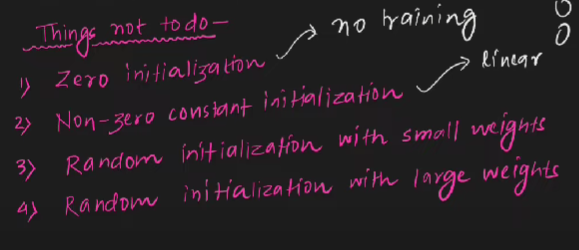

### What can be done


# Batch Normalization

* the inputs given to neural network is generally `normalized`.

* In batch normalization:- we `normalize the output` of a neuron to another layer. ie; ` u = 0, sigma = 1`
* This makes the training faster and stable.

How normalization helps?

- Before normalization, the contour is spread non-uniformly, hence the we need to take the learning rate smaller, but it increase the training time.
- For normalized data, reaching minima is easier (as mean centric aroud 0)

Internal Covariate shift:-

continous change in the distribution of the network activations i.e, output of a layer, during training.

As a result, the input received by deeper layer don't remain normalized anymore.

why to use `batch normalization`
* Batch normalization ensures the output to othe layers become `normalized`.


Steps:
* We apply batch normalization as per our desired `layer`, and it is applied on all the neurons of that layer
* All the neurons are normalized differntly in a layer.
* First we find the `mean` and `std` for the batch and do the normalization
* Second, we do `z` = `y*Z`+  $beta$, ie, scale and shifting
* Then the value of a neurons goes to the activation functtion.

It behaves as a `new layer`
* It has its own learnable parametter ${\beta}$ and ${\gamma}$ for all the neurons

### During test: Batch normalization

* we maintain the parameters for each batch size: $\beta$,  $\gamma$,  $\mu$,  $\sigma$.
* $\beta$,   $\gamma$ are learnable parameters  and $\mu$,  $\sigma$ non-learnable.
* For each batch, we have the updated $\beta$,   $\gamma$ and thus updating  $\mu$,  $\sigma$.
* So for each batch, we have  $\mu$,  $\sigma$, and we find `EWMA`- exponentially weighted moving average/standard deviation.
* Based on those `EWMA`  $\mu$ and $\sigma$, we use  for testing.

### Advantages of batch normalization:

* stable
* faster
* regulalizer but mild.
* reduce the limitation impact of weight initialization.

# Code

In [31]:
X,y = make_circles(n_samples = 100, noise=0.1, random_state = 1)

In [45]:
df = pd.DataFrame({'x1': X[:, 0], 'x2': X[:, 1], 'y': y})

In [46]:
df.head()

,x1,x2,y
0,-0.636405,-0.368702,1
1,-0.244660,-0.736592,1
2,-0.465971,-1.066877,0
3,-0.709998,-0.408419,1
4,0.702322,-0.517301,1


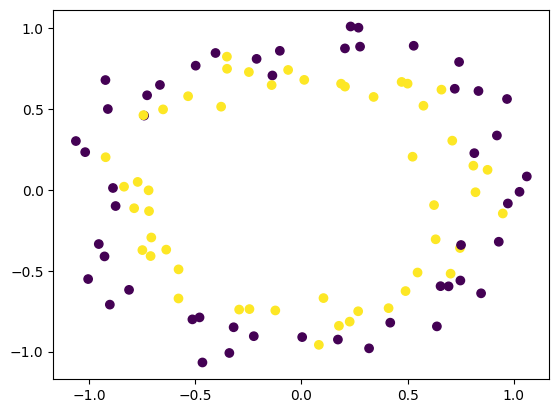

In [104]:
plt.scatter(df['x1'], df['x2'], c= df['y'])
plt.show()

* Data in linearly inseperable.

In [105]:
# again converting it back to its earlier form
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [106]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

#### Model building

In [107]:
model = Sequential()

model.add(Dense(2, activation = 'relu', input_dim = 2)) # input layer
model.add(Dense(2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) # output layer

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',  metrics = ['accuracy'])

In [109]:
history = model.fit(X, y, epochs = 20,validation_split= 0.2)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 136ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.3500 - val_loss: 0.6937
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5500 - loss: 0.6923 - val_accuracy: 0.3500 - val_loss: 0.6942
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5383 - loss: 0.6921 - val_accuracy: 0.3500 - val_loss: 0.6947
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5383 - loss: 0.6923 - val_accuracy: 0.3500 - val_loss: 0.6952
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5422 - loss: 0.6920 - val_accuracy: 0.3500 - val_loss: 0.6958
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5617 - loss: 0.6914 - val_accuracy: 0.3500 - val_loss: 0.6963
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5539 - loss: 0.6921 - val_accuracy: 0.3500 - val_loss: 0.6968
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5266 - loss: 0.6922 - val_accuracy: 0.3500 - val_loss: 0.6971

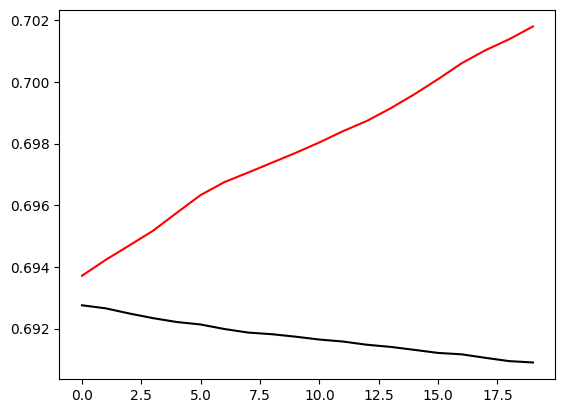

In [110]:
plt.plot(history.history['loss'], color = 'black')
plt.plot(history.history['val_loss'],color ='red')


validation loss is increasing, can say it's overfitting

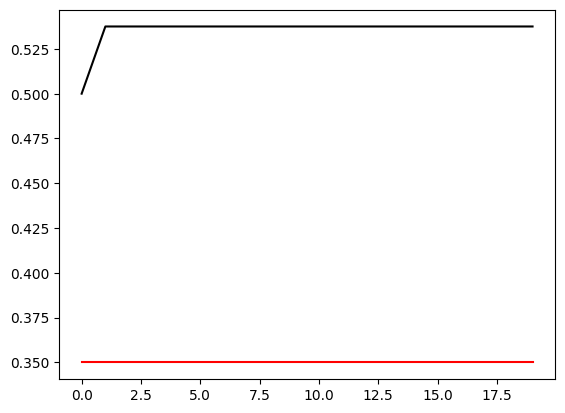

In [111]:
plt.plot(history.history['accuracy'], color = 'black')
plt.plot(history.history['val_accuracy'], color = 'red')

## With Batch Normalization

In [114]:
model = Sequential()


model.add(Dense(3, activation = 'relu', input_dim = 2)) # input layer
model.add(BatchNormalization())
model.add(Dense(2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid')) # output layer

model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [115]:
# we can see that the number of parameters increased, due to addition of new parameters for batch
# 4 params * 3 neurons  = 12 for first one.
# 4 params * 2 neurons  = 8 for second.

In [116]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [117]:
history2 = model.fit(X,y,epochs=20,validation_split=0.2)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.3891 - loss: 1.3235 - val_accuracy: 0.3500 - val_loss: 0.9277
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4195 - loss: 1.2811 - val_accuracy: 0.3500 - val_loss: 0.9192
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4398 - loss: 1.3129 - val_accuracy: 0.3500 - val_loss: 0.9126
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4195 - loss: 1.2721 - val_accuracy: 0.3500 - val_loss: 0.9056
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3914 - loss: 1.2360 - val_accuracy: 0.3500 - val_loss: 0.8999
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4430 - loss: 1.2487 - val_accuracy: 0.3500 - val_loss: 0.8945
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4867 - loss: 1.1092 - val_accuracy: 0.3500 - val_loss: 0.8893
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4203 - loss: 1.2188 - val_accuracy: 0.3500 - val_loss: 0.8843

### Plots for `2nd` model

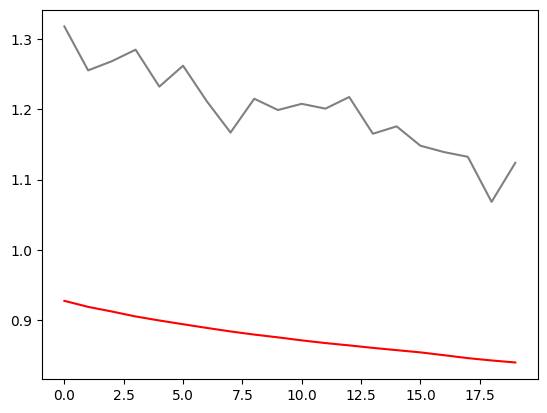

In [118]:
# For the second neural network after applying batch normalization.
plt.plot(history2.history['loss'], color = 'grey')
plt.plot(history2.history['val_loss'], color = 'red')

We can see that the validation loss is decreasing, but it was increasing for the first model.
Hence, we can say that the `batch normalization` reduced the `overfitting`.
                                                                        

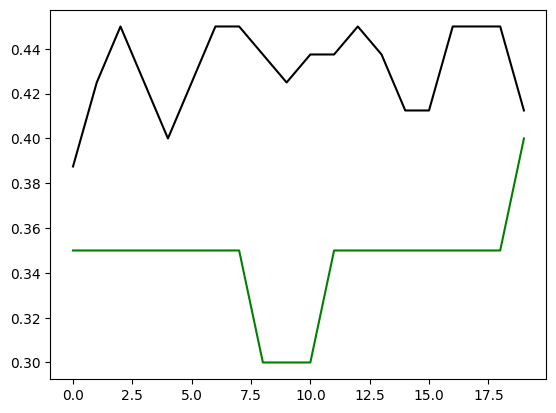

In [119]:
# plotting the accuracy
plt.plot(history2.history['accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

We can see that the model accuracy increased with the addition of `batch normalization`.
It will do good if we run for larger `epochs`. Here just for demonstration, we restricted to lower epoch value.

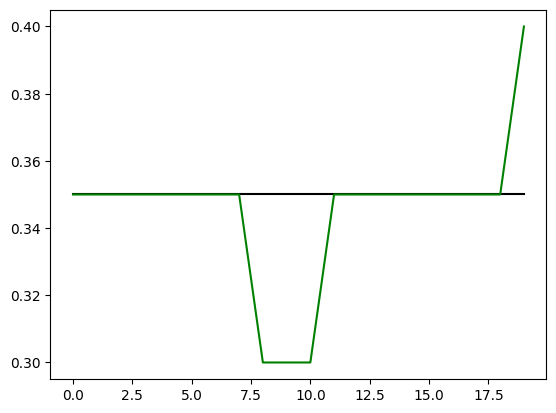

In [120]:
plt.plot(history.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

In [121]:
# accuracy on the training data is increasing in case of second network.
# although, we are not getting proper graph, as we have not added that many layers and neurons.
